In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import string
import re
import nltk
import sklearn

                                                                                                                                                                                                                                                                                                                        
%matplotlib inline

In [2]:
clean_data = pd.read_excel('clean.xlsx')
clean_data = clean_data.iloc[np.random.permutation(len(clean_data))]
clean_data = clean_data.reset_index(drop=True)

# Preprocessing step

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

def replacewithstem(text):
    tokens = nltk.word_tokenize(text)
    stemmer = nltk.stem.porter.PorterStemmer()
    
    stemmed = []
    for token in tokens:
        stemmed.append(stemmer.stem(token))
        
    return ' '.join(stemmed)

clean_data['Text_Stemmed']= clean_data['Text'].apply(replacewithstem)

In [4]:
text_stemmed = list(clean_data['Text_Stemmed'])

tfidf_stem = TfidfVectorizer(stop_words='english')
train_tfidf = tfidf_stem.fit_transform(text_stemmed)

In [5]:
train_tfidf.shape

(21768, 45210)

In [6]:
np.save('train_tfidf.npy',train_tfidf)

# Splitting into train, test, validate

In [8]:
from sklearn.cross_validation import train_test_split

data_train_and_validation, data_test, labels_train_and_validation, labels_test = train_test_split(train_tfidf, clean_data['Category'], test_size = 0.10, random_state = 0)

data_train, data_validation, labels_train, labels_validation = train_test_split(data_train_and_validation, labels_train_and_validation, test_size = 0.20, random_state = 0)

# Trying logistic regression -- l1 = 0.26366508987303555 ---gives 67% accuracy.....not really improved

In [24]:
from sklearn.linear_model import LogisticRegression

l1error=[]
l2error=[]
i=0
for c in np.logspace(-5,1,20):
    #print("Printing penalty")
    #print(c)
    print(i)
    i=i+1
    regressionl1 = LogisticRegression(penalty='l1', C=c, tol=0.01)
    regressionl2 = LogisticRegression(penalty='l2', C=c, tol=0.01)
    
    regressionl1.fit(data_train, labels_train)
    regressionl2.fit(data_train, labels_train)
    
    l1error.append((c,sklearn.metrics.accuracy_score(labels_validation,regressionl1.predict(data_validation), normalize=True)))
    
    l2error.append((c,sklearn.metrics.accuracy_score(labels_validation,regressionl2.predict(data_validation), normalize=True)))
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


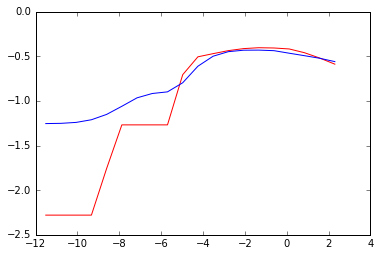

In [25]:
plt.plot(*zip(*np.log(l1error)),c='r')
plt.plot(*zip(*np.log(l2error)),c='b')

In [26]:
l1error.sort(key=lambda tup: tup[1])
l1error[-1]

(0.26366508987303555, 0.66726205664710381)

In [27]:
l2error.sort(key=lambda tup: tup[1])
l2error[-1]

(0.26366508987303555, 0.6496555243684613)